In [ ]:
#ZADANIE 1

In [ ]:
import tensorflow as tf
import math
import timeit
device_name = tf.test.gpu_device_name()
if device_name != '/device:GPU:0':
  raise SystemError('GPU device not found')
print('Found GPU at: {}'.format(device_name))

Found GPU at: /device:GPU:0


In [ ]:
#Simpson's Method

def integral(y, x):
    dx = (x[-1] - x[0]) / (int(x.shape[0]) - 1)
    return (y[0] + y[-1] + 4*tf.reduce_sum(y[1:-1:2]) + 2*tf.reduce_sum(y[2:-1:2])) * dx / 3

# Launch the graph in a session.
with tf.compat.v1.Session() as ses:

  # Build a graph.
  a = tf.constant(0, dtype=tf.float64)
  b = tf.constant(1, dtype=tf.float64)
  x = tf.linspace(a, b, 1000)
  result = integral(tf.math.sqrt(1.3*x+0.2)/tf.math.log(x+1.1), x)

  # Evaluate the tensor `result`.
  sess = tf.compat.v1.Session()
  print("Metoda Simpsona:", end=" ")
  print(sess.run(result))

Metoda Simpsona: 2.20941615107219


In [ ]:
#Simpson's Method by CPU
def cpu():
  with tf.device('/cpu:0'):
    def integral(y, x):
      dx = (x[-1] - x[0]) / (int(x.shape[0]) - 1)
      return (y[0] + y[-1] + 4*tf.reduce_sum(y[1:-1:2]) + 2*tf.reduce_sum(y[2:-1:2])) * dx / 3
    # Launch the graph in a session.
    with tf.compat.v1.Session() as ses:
      # Build a graph.
      a = tf.constant(0, dtype=tf.float64)
      b = tf.constant(1, dtype=tf.float64)
      x = tf.linspace(a, b, 1000)
      result = integral(tf.math.sqrt(1.3*x+0.2)/tf.math.log(x+1.1), x)

      # Evaluate the tensor `result`.
      sess = tf.compat.v1.Session()
  return 0

cpu()
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)

#Simpson's Method by GPU
def gpu():
  with tf.device('/device:GPU:0'):
    def integral(y, x):
      dx = (x[-1] - x[0]) / (int(x.shape[0]) - 1)
      return (y[0] + y[-1] + 4*tf.reduce_sum(y[1:-1:2]) + 2*tf.reduce_sum(y[2:-1:2])) * dx / 3
    # Launch the graph in a session.
    with tf.compat.v1.Session() as ses:
      # Build a graph.
      a = tf.constant(0, dtype=tf.float64)
      b = tf.constant(1, dtype=tf.float64)
      x = tf.linspace(a, b, 1000)
      result = integral(tf.math.sqrt(1.3*x+0.2)/tf.math.log(x+1.1), x)
      # Evaluate the tensor `result`.
      sess = tf.compat.v1.Session()
  return 0

gpu()
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)

CPU (s):
0.4749282499999481
GPU (s):
0.4942055500000606


In [ ]:
#Trapezoidal Method

def integral(y, x):
    dx = (x[-1] - x[0]) / (int(x.shape[0]) - 1)
    return ((y[0] + y[-1])/2 + tf.reduce_sum(y[1:-1])) * dx

# Launch the graph in a session.
with tf.compat.v1.Session() as ses:

  # Build a graph.
  a = tf.constant(0, dtype=tf.float64)
  b = tf.constant(1, dtype=tf.float64)
  x = tf.linspace(a, b, 1000)
  #result = integral(x*x+2*x, x)
  result = integral(tf.math.sqrt(1.3*x+0.2)/tf.math.log(x+1.1), x)

  # Evaluate the tensor `result`.
  sess = tf.compat.v1.Session()
  print("Metoda Trapezów:", end=" ")
  print(sess.run(result))

Metoda Trapezów: 2.209969440534477


In [ ]:
#Trapezoidal Method by CPU
def cpu():
  def integral(y, x):
    dx = (x[-1] - x[0]) / (int(x.shape[0]) - 1)
    return ((y[0] + y[-1])/2 + tf.reduce_sum(y[1:-1])) * dx
  # Launch the graph in a session.
  with tf.compat.v1.Session() as ses:
    # Build a graph.
    a = tf.constant(0, dtype=tf.float64)
    b = tf.constant(1, dtype=tf.float64)
    x = tf.linspace(a, b, 1000)
    #result = integral(x*x+2*x, x)
    result = integral(tf.math.sqrt(1.3*x+0.2)/tf.math.log(x+1.1), x)
    # Evaluate the tensor `result`.
    sess = tf.compat.v1.Session()
  return 0

cpu()
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)

#Trapezoidal Method by GPU
def cpu():
  def integral(y, x):
    dx = (x[-1] - x[0]) / (int(x.shape[0]) - 1)
    return ((y[0] + y[-1])/2 + tf.reduce_sum(y[1:-1])) * dx
  # Launch the graph in a session.
  with tf.compat.v1.Session() as ses:
    # Build a graph.
    a = tf.constant(0, dtype=tf.float64)
    b = tf.constant(1, dtype=tf.float64)
    x = tf.linspace(a, b, 1000)
    #result = integral(x*x+2*x, x)
    result = integral(tf.math.sqrt(1.3*x+0.2)/tf.math.log(x+1.1), x)
    # Evaluate the tensor `result`.
    sess = tf.compat.v1.Session()
  return 0

gpu()
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)

CPU (s):
0.44048126300003787
GPU (s):
0.49152585800004545


In [ ]:
#Rectangular Method
def integral(y, x):
    dx = (x[-1] - x[0]) / (int(x.shape[0]) - 1)
    return ((y[0] + y[-1]) + tf.reduce_sum(y[1:-1])) * dx

# Launch the graph in a session.
with tf.compat.v1.Session() as ses:

  # Build a graph.
  a = tf.constant(0, dtype=tf.float64)
  b = tf.constant(1, dtype=tf.float64)
  x = tf.linspace(a, b, 1000)
  #result = integral(x*x+2*x, x)
  result = integral(tf.math.sqrt(1.3*x+0.2)/tf.math.log(x+1.1), x)

  # Evaluate the tensor `result`.
  sess = tf.compat.v1.Session()
  print("Metoda Prostokątów:", end=" ")
  print(sess.run(result))

Metoda Prostokątów: 2.2131440802927407


In [ ]:
#Rectangular Method by CPU
def cpu():
  def integral(y, x):
    dx = (x[-1] - x[0]) / (int(x.shape[0]) - 1)
    return ((y[0] + y[-1]) + tf.reduce_sum(y[1:-1])) * dx
  # Launch the graph in a session.
  with tf.compat.v1.Session() as ses:
    # Build a graph.
    a = tf.constant(0, dtype=tf.float64)
    b = tf.constant(1, dtype=tf.float64)
    x = tf.linspace(a, b, 1000)
    #result = integral(x*x+2*x, x)
    result = integral(tf.math.sqrt(1.3*x+0.2)/tf.math.log(x+1.1), x)
  return 0

cpu()
print('CPU (s):')
cpu_time = timeit.timeit('cpu()', number=10, setup="from __main__ import cpu")
print(cpu_time)

#Rectangular Method by GPU
def gpu():
  def integral(y, x):
    dx = (x[-1] - x[0]) / (int(x.shape[0]) - 1)
    return ((y[0] + y[-1]) + tf.reduce_sum(y[1:-1])) * dx
  # Launch the graph in a session.
  with tf.compat.v1.Session() as ses:
    # Build a graph.
    a = tf.constant(0, dtype=tf.float64)
    b = tf.constant(1, dtype=tf.float64)
    x = tf.linspace(a, b, 1000)
    #result = integral(x*x+2*x, x)
    result = integral(tf.math.sqrt(1.3*x+0.2)/tf.math.log(x+1.1), x)
  return 0

gpu()
print('GPU (s):')
gpu_time = timeit.timeit('gpu()', number=10, setup="from __main__ import gpu")
print(gpu_time)

CPU (s):
0.4034677790000387
GPU (s):
0.4068862609999542


In [ ]:
#############################################################################
#############################################################################
#ZADANIE 2

In [ ]:
#Interpolacja funkcji 1D
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense

def inputfunct(x):
  return (x-2)*(x+1)*(x-4)

x = np.arange(-100.0, 100.0, 0.005, dtype = float)
y = []
for i in x:
  y.append(inputfunct(i))
y = np.array(y, dtype = float)

### Model creation: adding layers and compilation
model = tf.keras.Sequential()
model.add(Dense(1, input_shape = [1], activation='relu'))
model.add(Dense(500, activation='relu', input_shape = [1]))
model.add(Dense(500, activation='relu', input_shape = [1]))
model.add(Dense(500, activation='relu', input_shape = [1]))
model.add(Dense(500, activation='relu', input_shape = [1]))
model.add(Dense(500, activation='relu', input_shape = [1]))
model.add(Dense(500, activation='relu', input_shape = [1]))
model.add(Dense(500, activation='relu', input_shape = [1]))
model.add(Dense(500, activation='relu', input_shape = [1]))
model.add(Dense(1, activation='linear'))


model.compile(optimizer='adam', loss='MSLE')
#Train the Neural Network
model.fit(x, y, epochs = 50, steps_per_epoch = 500)

Epoch 1/50
500/500 [==============================] - 2s 2ms/step - loss: 4.2288
Epoch 2/50
500/500 [==============================] - 1s 2ms/step - loss: 0.0628
Epoch 3/50
500/500 [==============================] - 1s 2ms/step - loss: 0.0549
Epoch 4/50
500/500 [==============================] - 1s 2ms/step - loss: 0.0573
Epoch 5/50
500/500 [==============================] - 1s 2ms/step - loss: 0.0579
Epoch 6/50
500/500 [==============================] - 1s 2ms/step - loss: 0.0568
Epoch 7/50
500/500 [==============================] - 1s 2ms/step - loss: 0.0495
Epoch 8/50
500/500 [==============================] - 1s 2ms/step - loss: 0.0522
Epoch 9/50
500/500 [==============================] - 1s 2ms/step - loss: 0.0541
Epoch 10/50
500/500 [==============================] - 1s 2ms/step - loss: 0.0502
Epoch 11/50
500/500 [==============================] - 1s 2ms/step - loss: 0.0496
Epoch 12/50
500/500 [==============================] - 1s 2ms/step - loss: 0.0538
Epoch 13/50
500/500 [====

In [ ]:
print(model.predict([15.0]))

[[2285.7673]]


In [ ]:
print(model.predict([12.0]))

[[1034.5336]]


In [ ]:
#Interpolacja funkcji 2D
import numpy as np
import tensorflow as tf
from tensorflow import keras
from keras.models import Sequential
from keras.layers import Dense
from math import sin, sqrt, pow

def inputfunct(x, y):
  return sin(sqrt(pow(x, 2) + pow(y, 2)))/sqrt(pow(x, 2) + pow(y, 2))

x2 = np.arange(-100.0, 100.0, 0.01, dtype = float)
y2 = np.arange(-100.0, 100.0, 0.01, dtype = float)
z = []
xy = []
for l, m in zip(x, y):
  z.append(inputfunct(l, m))
  xy.append([l, m])
xy = np.array(xy, dtype = float)
z = np.array(z, dtype = float)

### Model creation: adding layers and compilation
model2 = tf.keras.Sequential()
model2.add(Dense(1, input_shape = [2], activation='relu'))
model2.add(Dense(500, activation='relu', input_shape = [2]))
model2.add(Dense(500, activation='relu', input_shape = [2]))
model2.add(Dense(1, activation='linear'))


model2.compile(optimizer='adam', loss='MSE')
#Train the Neural Network
model2.fit(xy, z, epochs = 50, steps_per_epoch = 50)

Epoch 1/50
50/50 [==============================] - 0s 2ms/step - loss: 5086523.2966
Epoch 2/50
50/50 [==============================] - 0s 2ms/step - loss: 11083.8481
Epoch 3/50
50/50 [==============================] - 0s 2ms/step - loss: 63.4659
Epoch 4/50
50/50 [==============================] - 0s 2ms/step - loss: 248.6637
Epoch 5/50
50/50 [==============================] - 0s 2ms/step - loss: 7.3877
Epoch 6/50
50/50 [==============================] - 0s 2ms/step - loss: 0.0187
Epoch 7/50
50/50 [==============================] - 0s 2ms/step - loss: 0.0968
Epoch 8/50
50/50 [==============================] - 0s 2ms/step - loss: 0.0032
Epoch 9/50
50/50 [==============================] - 0s 2ms/step - loss: 0.0015
Epoch 10/50
50/50 [==============================] - 0s 2ms/step - loss: 0.0014
Epoch 11/50
50/50 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 12/50
50/50 [==============================] - 0s 2ms/step - loss: 0.0016
Epoch 13/50
50/50 [=================

In [ ]:
print(model2.predict([[2.0, 2.0]]))

[[-0.00284236]]


In [ ]:
print(model2.predict([[8.0, 8.0]]))

[[-0.00284236]]


In [ ]:
#############################################################################
#############################################################################
#ZADANIE 3

In [ ]:
import math
import tensorflow as tf
from tensorflow import keras
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
fashion_mnist = keras.datasets.fashion_mnist
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()
x_train.shape, x_test.shape, np.unique(y_train)

4423680/4422102 [==============================] - 0s 0us/step


((60000, 28, 28),
 (10000, 28, 28),
 array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8))

In [ ]:
class_names = {i:cn for i, cn in enumerate(['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']) }

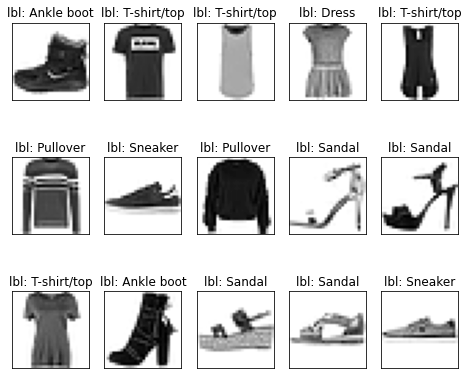

In [ ]:
def plot(images, labels, predictions=None):
  
    # create a grid with 5 columns
    n_cols = min(5, len(images))
    n_rows = math.ceil(len(images) / n_cols)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(n_cols+3, n_rows+4))
    
    if predictions is None:
        predictions = [None] * len(labels)
        
    for i, (x, y_true, y_pred) in enumerate(zip(images, labels, predictions)):
        ax = axes.flat[i]
        ax.imshow(x, cmap=plt.cm.binary)
        
        ax.set_title(f"lbl: {class_names[y_true]}")
        
        if y_pred is not None:
            ax.set_xlabel(f"pred: {class_names[y_pred]}")
    
        ax.set_xticks([])
        ax.set_yticks([])

# plot first few images
plot(x_train[:15], y_train[:15])  

In [ ]:
x_train = x_train / 255.0
x_test = x_test / 255.0

In [ ]:
from tensorflow.keras.layers import Flatten, add, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential

modelP = tf.keras.Sequential()
modelP.add(Flatten(input_shape=(28, 28)))
modelP.add(Dense(128, activation='relu'))
modelP.add(Dropout(0.2))
modelP.add(Dense(64, activation='relu'))
modelP.add(Dropout(0.2))
modelP.add(Dense(32, activation='relu'))
modelP.add(Dropout(0.2))
modelP.add(Dense(10, activation = 'softmax'))

EarlyStop = EarlyStopping(monitor='val_loss', patience=3, verbose=1)

modelP.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
modelP.fit(x_train, y_train, batch_size=60, epochs=10, validation_split=0.2, callbacks = [EarlyStop])

Epoch 1/10
800/800 [==============================] - 2s 3ms/step - loss: 1.0461 - accuracy: 0.6242 - val_loss: 0.4536 - val_accuracy: 0.8347
Epoch 2/10
800/800 [==============================] - 2s 2ms/step - loss: 0.5109 - accuracy: 0.8205 - val_loss: 0.4211 - val_accuracy: 0.8487
Epoch 3/10
800/800 [==============================] - 2s 2ms/step - loss: 0.4566 - accuracy: 0.8405 - val_loss: 0.3921 - val_accuracy: 0.8601
Epoch 4/10
800/800 [==============================] - 2s 2ms/step - loss: 0.4220 - accuracy: 0.8506 - val_loss: 0.3654 - val_accuracy: 0.8647
Epoch 5/10
800/800 [==============================] - 2s 2ms/step - loss: 0.4067 - accuracy: 0.8530 - val_loss: 0.3735 - val_accuracy: 0.8619
Epoch 6/10
800/800 [==============================] - 2s 2ms/step - loss: 0.3903 - accuracy: 0.8629 - val_loss: 0.3529 - val_accuracy: 0.8723
Epoch 7/10
800/800 [==============================] - 2s 2ms/step - loss: 0.3688 - accuracy: 0.8671 - val_loss: 0.3557 - val_accuracy: 0.8734
Epoch 

In [ ]:
loss, accuracy = modelP.evaluate(x_test, y_test)
print(f"Accuracy = {accuracy*100:.2f} %")

313/313 [==============================] - 1s 2ms/step - loss: 0.3610 - accuracy: 0.8714
Accuracy = 87.14 %


In [ ]:
from ipywidgets import interact, widgets
img_idx_slider = widgets.IntSlider(value=0, min=0, max=len(x_test)-1, description="Image index")
probs = modelP.predict(x_test)
preds = np.argmax(modelP.predict(x_test), axis=-1)
@interact(i=img_idx_slider)
def visualize_prediction(i=0):
    fix, (ax1, ax2) = plt.subplots(1, 2, figsize=(10, 5))
    ax1.imshow(x_test[i], cmap=plt.cm.binary)
    ax1.set_title(f"lbl: {class_names[y_test[i]]}")
    ax1.set_xlabel(f"pred: {class_names[preds[i]]}")


    ax2.bar(x=[class_names[i] for i in range(10)], height=probs[i]*100)
    plt.xticks(rotation=90)

interactive(children=(IntSlider(value=0, description='Image index', max=9999), Output()), _dom_classes=('widge…